# Dataset 2: Sales and Inventory Data of Vietnam Retailers
About this dataset
The dataset includes practical information about the sales and inventory data of many retailers in Vietnam in the domain of fashion. The dataset includes sales data (from 2022 - 2023), inventory management data (from 2022 - 2023), and master data, which includes information such as details of prices, products, and distribution channels.
Data explanation
The dataset contains many files and is divided into three areas
## Sales data area
Sales data are collected every month from 2022 - 2023, the files follow the format
TT T<month>-‹year> .xlsx"

Where

<month> represents the month number (from 01 to 12)

<year> represents year number (2022 or 2023).

For example, the file "TT TO1-2022.xls" represents the sales data for January 2022
Each file includes the following data fields:

• month: month in year

• week: week in year

• site: warehouse/store ID

• branch_id: the branch ID

• channel_id: code of distribution channel

• distribution_channel: kind of distribution channel

• distribution_channel_code: Determine the distribution channel's unique code.

• sold_quantity: the number of products or units that have been sold (SỐ LƯỢNG TIÊU THỤ)

• cost _price: the direct costs associated with producing or purchasing the goods that a company sells during a specific accounting period. (TRỊ GIÁ TIÊU THỤ - GIÁ VỐN)

• net _price: the final price of a product (TRỊ GIÁ TIÊU THỊ - GIÁ SAU CHIẾT KHẤU)

• customer_id: the customer ID

• product_id: the product ID
## Inventory data area
Inventory data includes multiple files representing the information on inventory management across plants
(stocks), the data is collected between 2022 and 2023 at the end of every two months. The files follow
the format

"‹date>-<month>-<year>_Ton Kho <start_plant_id> - <end_plant id>.xIsx"

Where
<data>-<month>-<year> represents the date of the inventory data collection
<start_plant_id>-<end_plant_id> represents the range of plant IDs

For instance, the file "31-10-2022_Ton Kho 1161 - 1170xlsx" represents the inventory management data
collected at the end of October in the stocks having IDs from 1161 to 1170
Each file includes the following data fields:

• plant: the id of plant/stock

• calendar_year: year

• calendar_yeer_week: week in year

• sloc: site location

• quantity: represents the overall inventory quantity of products

• total_amount: a total of monetary values

• product_id: represents the product ID
## Master data area
This area includes the following data files

• COGS.xisx: cost price information (Thông tin giá vốn)

• Retail_price.xls: selling price information (Thông tin giá bán)

• Productmaster.xisx: details of product information

• New_Core_Classification.xlsx: illustrates when a product is for sell

• Distribution Channel.xisx: details information of distributors (which are stores or shops that buy products and sell to customers)
The details of the data fields for each file are as follows

COGS.xisx

• amount: monetary values denominated in VND currency units

• valid_from: start date

• product_id: represents the product ID

Retail_price.xlsx

• amount: monetary values denominated in VND currency units

• valid_from: start date

• valid_to: end date

• product_id: represents the product ID

Productmaster.xlsx

• color: Product colors by gender category

• color _group: Similar color groups

• listing_price: detail price of each product

• price_group: Different price groups can influence consumer decisions

• gender: The product users are classified by gender and age

• product_group: Group of products with similar characteristics in terms of design and structure

• detail_product group: Group of product types with similar stylistic features.

• shoe_product: Group of shoe product details with similar characteristics in terms of material

• size_group: Main frame sizes by gender group or special and exceptional frames

• size: Size of each individual product detail

• age_group: Age groups with different preferences and consumer behaviors

• activity_group: A collection of activities with similar usage purposes

• image_copyright: Detailed copyright character name

• lifestyle_group: The fashion styles that consumers aspire to when choosing products

• launch_season: the time period during

• mold_code: Information about the product's heel code

• heel_height: Group of products with a common heel height

• option: A collection of product codes with similar details

• cost_price: includes all the expenses associated with producing or acquiring a product

• product id: represents the product ID

• product_syle_color: represents the style color of a product

• product, syle: represents the style of a product

• brand_name: name of the branch

• vendor_name: name of the vendor

New_Core_Classification.xlsx

• lauch season: launch in this season

• lauch season_num: launch in this season

• sales_season: sale in this season

• sales_season_num: sale in this season

• final_status: status of the product

• b2c_assortment: Deciding to do business

• b2b_assortment: Deciding to do business

• total_assortment: Decision to do business is 1, not to do business is 0 (2 small channels are 0,
then 0 is required, two small channels are 1, then one is required, 1 of the two channels is 1, then 1 is
required)

• product_syle_color: This is the product id" with the last two characters removed, which
represents the product's style and color.

Distribution Channel.xlsx

• b2b_b2c: types of commercial relationships

• channel_id: code of distribution channel

• region: the region

• city_level: the city's level

• store_concept: Detailed business store model

• trade_term: used to define the responsibilities and obligations of buyers and sellers in a sales
contract or international transaction

• area_range: area's range

• store_type: the type of store

• urbanization: the kind of urban

• branch_area: area location of branch

• address_2: district

• address_3: province code

• showroom_area: the area of showroom

• warehouse_area: the area of the warehouse

• start_month: opening month

• start_year: opening year

• end_month: closing month

• end_year: closing year

• note: note for the special cases

• customer_id: the customer ID

• customer_name: the customer's name

# Recommendation Systems with TensorFlow

This Colab notebook complements the course on [Recommendation Systems](https://developers.google.com/machine-learning/recommendation/). Specifically, we'll be using matrix factorization to learn user and products embeddings.



# Introduction


## Outline
  1. Data insights
  1. Preliminaries
  1. Training a matrix factorization model
  1. Inspecting the Embeddings
  1. Regularization in matrix factorization
  1. Softmax model training

## Setup

Let's get started by importing the required packages.

In [2]:
# @title Imports (run this cell)
from __future__ import print_function

import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

# Add some convenience functions to Pandas DataFrame.
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format
def mask(df, key, function):
  """Returns a filtered dataframe, by applying function to key"""
  return df[function(df[key])]

def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

# Install Altair and activate its colab renderer.
print("Installing Altair...")
!pip install git+git://github.com/altair-viz/altair.git
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('colab')
print("Done installing Altair.")

# Install spreadsheets and import authentication module.
USER_RATINGS = False
!pip install --upgrade -q gspread
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials

Instructions for updating:
non-resource variables are not supported in the long term


Installing Altair...
  Cloning git://github.com/altair-viz/altair.git to /tmp/pip-req-build-s1c4_zke
  Running command git clone --filter=blob:none --quiet git://github.com/altair-viz/altair.git /tmp/pip-req-build-s1c4_zke
  fatal: unable to connect to github.com:
  github.com[0: 140.82.114.3]: errno=Connection timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/altair-viz/altair.git /tmp/pip-req-build-s1c4_zke did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet git://github.com/altair-viz/altair.git /tmp/pip-req-build-s1c4_zke did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Done installing Altair.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We then download the MovieLens Data, and create DataFrames containing movies, users, and ratings.

In [6]:
# Load each data set (users, products, and sales).
user_cols = ['customer_id', 'customer_name', 'b2b_b2c']
users = pd.read_excel('/content/drive/Shareddrives/Datathon/Datathon/sales_and_inventory_mentor_data/MasterData/Distribution Channel.xlsx', usecols=user_cols)

In [7]:
product_cols = ['product_id', 'name_description', 'listing_price', 'lifestyle_group']
products = pd.read_excel('/content/drive/Shareddrives/Datathon/Datathon/sales_and_inventory_mentor_data/MasterData/Productmaster.xlsx', usecols=product_cols)

In [8]:
sales_cols = ['customer_id', 'product_id', 'sold_quantity']
sales = pd.read_excel('/content/drive/Shareddrives/Datathon/Datathon/sales_and_inventory_mentor_data/Sales_mentor/TT T06-2023_split_2.xlsx', usecols=sales_cols)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89318 entries, 0 to 89317
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sold_quantity  89318 non-null  int64 
 1   customer_id    89318 non-null  object
 2   product_id     89318 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
sales.head()

,sold_quantity,customer_id,product_id
0,1,2384aef55,46d9bb6fab8a4e9b9c12f36e989c23b2DOD42
1,1,2384aef55,10b099e31d68494badb18a3ece081581KEM39
2,-1,884049e1d,649e1c5a4ed142e9889c9b557dd13550CAM35
3,1,21c6228c8,911e8bb521b645fe898eec1bd51be322XAM36
4,1,838c58db4,a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40


In [11]:
sales = sales[['customer_id', 'product_id', 'sold_quantity']]
sales.head()

,customer_id,product_id,sold_quantity
0,2384aef55,46d9bb6fab8a4e9b9c12f36e989c23b2DOD42,1
1,2384aef55,10b099e31d68494badb18a3ece081581KEM39,1
2,884049e1d,649e1c5a4ed142e9889c9b557dd13550CAM35,-1
3,21c6228c8,911e8bb521b645fe898eec1bd51be322XAM36,1
4,838c58db4,a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40,1


In [12]:
# Check the length of users and unique customer_id in sales
print("Length of users:", len(users))
print("Length of unique customer_id in sales:", len(sales['customer_id'].unique()))

# Remove users not present in sales
users = users[users['customer_id'].isin(sales['customer_id'].unique())]

# Check the length of products and unique product_id in sales
print("Length of products:", len(products))
print("Length of unique product_id in sales:", len(sales['product_id'].unique()))

# Remove products not present in sales
products = products[products['product_id'].isin(sales['product_id'].unique())]

Length of users: 3405
Length of unique customer_id in sales: 518
Length of products: 94867
Length of unique product_id in sales: 12300


# I. Exploring the Data

> Indented block


Before we dive into model building, let's inspect our MovieLens dataset. It is usually helpful to understand the statistics of the dataset.

### Users
We start by printing some basic statistics describing the numeric user features.

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 3375
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   b2b_b2c        518 non-null    object
 1   customer_id    518 non-null    object
 2   customer_name  518 non-null    object
dtypes: object(3)
memory usage: 16.2+ KB


In [14]:
users.describe()

,b2b_b2c,customer_id,customer_name
count,518,518,518
unique,2,518,502
top,B2B,435043cf9,customer26
freq,259,1,2


We can also print some basic statistics describing the categorical user features

In [15]:
users.describe(include=[np.object])

<ipython-input-15-81b4aa1c5ed8>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  users.describe(include=[np.object])


,b2b_b2c,customer_id,customer_name
count,518,518,518
unique,2,518,502
top,B2B,435043cf9,customer26
freq,259,1,2


We can also create histograms to further understand the distribution of the users. We use Altair to create an interactive chart.

In [16]:
# @title Altair visualization code (run this cell)
# The following functions are used to generate interactive Altair charts.
# We will display histograms of the data, sliced by a given attribute.

# A function that generates a histogram of filtered data.
def filtered_hist(field, label, filter):
  """Creates a layered chart of histograms.
  The first layer (light gray) contains the histogram of the full data, and the
  second contains the histogram of the filtered data.
  Args:
    field: the field for which to generate the histogram.
    label: String label of the histogram.
    filter: an alt.Selection object to be used to filter the data.
  """
  base = alt.Chart().mark_bar().encode(
      x=alt.X(field, bin=alt.Bin(maxbins=10), title=label),
      y="count()",
  ).properties(
      width=300,
  )
  return alt.layer(
      base.transform_filter(filter),
      base.encode(color=alt.value('lightgray'), opacity=alt.value(.7)),
  ).resolve_scale(y='independent')


Next, we look at the distribution of ratings per user. Clicking on an occupation in the right chart will filter the data by that occupation. The corresponding histogram is shown in blue, and superimposed with the histogram for the whole data (in light gray). You can use SHIFT+click to select multiple subsets.

What do you observe, and how might this affect the recommendations?

In [17]:
# Create filters to be used to slice the data.
b2b_b2c_filter = alt.selection_multi(fields=["b2b_b2c"])
b2b_b2c_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y("b2b_b2c:N"),
    color=alt.condition(
        b2b_b2c_filter,
        alt.Color("b2b_b2c:N", scale=alt.Scale(scheme='category20')),
        alt.value("lightgray")),
).properties(width=300, height=300, selection=b2b_b2c_filter)


users_sales = (
    sales
    .groupby('customer_id', as_index=False)
    .agg({'sold_quantity': ['count', 'mean']})
    .flatten_cols()
    .merge(users, on='customer_id')
)

print(users_sales.columns)

# Create a chart for the count, and one for the mean.
alt.hconcat(
    filtered_hist('sold_quantity count', '# sales / user', b2b_b2c_filter),
    filtered_hist('sold_quantity mean', 'mean user sale', b2b_b2c_filter),
    b2b_b2c_chart,
    data=users_sales)

Index(['customer_id', 'sold_quantity count', 'sold_quantity mean', 'b2b_b2c',
       'customer_name'],
      dtype='object')


alt.HConcatChart(...)

### Movies

It is also useful to look at information about the movies and their ratings.

In [18]:
# movies_ratings = movies.merge(
#     ratings
#     .groupby('movie_id', as_index=False)
#     .agg({'rating': ['count', 'mean']})
#     .flatten_cols(),
#     on='movie_id')

# genre_filter = alt.selection_multi(fields=['genre'])
# genre_chart = alt.Chart().mark_bar().encode(
#     x="count()",
#     y=alt.Y('genre'),
#     color=alt.condition(
#         genre_filter,
#         alt.Color("genre:N"),
#         alt.value('lightgray'))
# ).properties(height=300, selection=genre_filter)

In [19]:
products_sales = products.merge(
    sales
    .groupby('product_id', as_index=False)
    .agg({'sold_quantity': ['count', 'mean']})
    .flatten_cols(),
    on='product_id')

style_filter = alt.selection_multi(fields=['genre'])
style_chart = alt.Chart().mark_bar().encode(
    x="count()",
    y=alt.Y('lifestyle_group'),
    color=alt.condition(
        style_filter,
        alt.Color("lifestyle_group:N"),
        alt.value('lightgray'))
).properties(height=300, selection=style_filter)

In [20]:
(products_sales[['product_id', 'sold_quantity count', 'sold_quantity mean']]
 .sort_values('sold_quantity count', ascending=False)
 .head(10))

,product_id,sold_quantity count,sold_quantity mean
11887,26a3574e5e244ae0a948296c80232780XNH25,313,1.476
11886,d3fdadf707de46058009b94b2e4a86fdTRG25,224,1.393
11835,841b43d2d4d3472aa5e4763af2b9871eTRG25,203,1.251
11834,260ea12c2d284536b01f71b51b62b58fTRG25,187,1.433
11885,c0ad24e036be4f268fd5fe889834c0afXNH23,180,1.389
11833,0a0407df1f6a4dfea01018d1802a6a8bTRG25,165,1.352
11832,224646772819482082b60b93770a92f1HOG23,164,1.189
3415,40e753827624426e9924952571f6abb3XNH41,158,1.759
3403,a9088af9e09d493d87520394469dfa63XAM40,150,1.447
4595,f1cc5e4f7160454aa718723c227d2495XAM25,148,1.236


In [21]:
(products_sales[['product_id', 'sold_quantity count', 'sold_quantity mean']]
 .mask('sold_quantity count', lambda x: x > 20)
 .sort_values('sold_quantity mean', ascending=False)
 .head(10))

,product_id,sold_quantity count,sold_quantity mean
5139,000108ac94864037b89c6d7ce78d1134KEM35,31,2.710
3389,1d44608ac67945c1a92447e24dd7101aDEN42,71,2.634
3394,d0b571578bc042cca688ec92debbedc4NAU41,83,2.614
3395,d86bc2002a4e458db33b6ceecde3ccb1NAU42,106,2.387
8379,5785af5fb96a46fc9730cd109ef14c61TIM33,43,2.349
8307,abe539cb84bd4da3884b0bcd98101172XAM32,26,2.308
8319,41be63891eb749c7970b6e42285decc8XDG34,21,2.286
5143,5e7f23bd00f342cdad9c3371d1faf2f7KEM39,36,2.278
3388,c116b86ccda5469e8f5657c53bcc61baDEN41,89,2.270
3386,521844b57252468082e29f9b3283d215DEN39,65,2.215


Finally, the last chart shows the distribution of the number of ratings and average rating.

In [22]:
# Display the number of ratings and average rating per movie.
alt.hconcat(
    filtered_hist('sold_quantity count', '# sales / product', style_filter),
    filtered_hist('sold_quantity mean', 'mean product sold_quantity', style_filter),
    style_chart,
    data=products_sales)

Output hidden; open in https://colab.research.google.com to view.

# II. Preliminaries

Our goal is to factorize the ratings matrix $A$ into the product of a user embedding matrix $U$ and movie embedding matrix $V$, such that $A \approx UV^\top$ with
$U = \begin{bmatrix} u_{1} \\ \hline \vdots \\ \hline u_{N} \end{bmatrix}$ and
$V = \begin{bmatrix} v_{1} \\ \hline \vdots \\ \hline v_{M} \end{bmatrix}$.

Here
- $N$ is the number of users,
- $M$ is the number of movies,
- $A_{ij}$ is the rating of the $j$th movies by the $i$th user,
- each row $U_i$ is a $d$-dimensional vector (embedding) representing user $i$,
- each row $V_j$ is a $d$-dimensional vector (embedding) representing movie $j$,
- the prediction of the model for the $(i, j)$ pair is the dot product $\langle U_i, V_j \rangle$.



## Sparse Representation of the Rating Matrix

The rating matrix could be very large and, in general, most of the entries are unobserved, since a given user will only rate a small subset of movies. For effcient representation, we will use a [tf.SparseTensor](https://www.tensorflow.org/api_docs/python/tf/SparseTensor). A `SparseTensor` uses three tensors to represent the matrix: `tf.SparseTensor(indices, values, dense_shape)` represents a tensor, where a value $A_{ij} = a$ is encoded by setting `indices[k] = [i, j]` and `values[k] = a`. The last tensor `dense_shape` is used to specify the shape of the full underlying matrix.

#### Toy example
Assume we have $2$ users and $4$ movies. Our toy ratings dataframe has three ratings,

user\_id | movie\_id | rating
--:|--:|--:
0 | 0 | 5.0
0 | 1 | 3.0
1 | 3 | 1.0

The corresponding rating matrix is

$$
A =
\begin{bmatrix}
5.0 & 3.0 & 0 & 0 \\
0   &   0 & 0 & 1.0
\end{bmatrix}
$$

And the SparseTensor representation is,
```python
SparseTensor(
  indices=[[0, 0], [0, 1], [1,3]],
  values=[5.0, 3.0, 1.0],
  dense_shape=[2, 4])
```



### Exercise 1: Build a tf.SparseTensor representation of the Rating Matrix.

In this exercise, we'll write a function that maps from our `ratings` DataFrame to a `tf.SparseTensor`.

Hint: you can select the values of a given column of a Dataframe `df` using `df['column_name'].values`.

In [23]:
# def build_rating_sparse_tensor(ratings_df):
#   """
#   Args:
#     ratings_df: a pd.DataFrame with `user_id`, `movie_id` and `rating` columns.
#   Returns:
#     A tf.SparseTensor representing the ratings matrix.
#   """
#   # ========================= Complete this section ============================
#   # indices =
#   # values =
#   # ============================================================================

#   return tf.SparseTensor(
#       indices=indices,
#       values=values,
#       dense_shape=[users.shape[0], movies.shape[0]])

In [24]:
#@title Solution
def build_rating_sparse_tensor(sales_df):
  """
  Args:
    sales_df: a pd.DataFrame with `customer_id`, `product_id` and `sold_quantity` columns.
  Returns:
    a tf.SparseTensor representing the ratings matrix.
  """
  indices = sales_df[['customer_id', 'product_id']].values
  values = sales_df['sold_quantity'].values
  return tf.SparseTensor(
      indices=indices,
      values=values,
      dense_shape=[users.shape[0], products.shape[0]])
      # dense_shape=[len(sales.customer_id.unique()), len(sales.product_id.unique())])


## Calculating the error

The model approximates the ratings matrix $A$ by a low-rank product $UV^\top$. We need a way to measure the approximation error. We'll start by using the Mean Squared Error of observed entries only (we will revisit this later). It is defined as

$$
\begin{align*}
\text{MSE}(A, UV^\top)
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( A_{ij} - (UV^\top)_{ij})^2} \\
&= \frac{1}{|\Omega|}\sum_{(i, j) \in\Omega}{( A_{ij} - \langle U_i, V_j\rangle)^2}
\end{align*}
$$
where $\Omega$ is the set of observed ratings, and $|\Omega|$ is the cardinality of $\Omega$.



### Exercise 2: Mean Squared Error

Write a TensorFlow function that takes a sparse rating matrix $A$ and the two embedding matrices $U, V$ and returns the mean squared error $\text{MSE}(A, UV^\top)$.

Hints:
  * in this section, we only consider observed entries when calculating the loss.
  * a `SparseTensor` `sp_x` is a tuple of three Tensors: `sp_x.indices`, `sp_x.values` and `sp_x.dense_shape`.
  * you may find [`tf.gather_nd`](https://www.tensorflow.org/api_docs/python/tf/gather_nd) and  [`tf.losses.mean_squared_error`](https://www.tensorflow.org/api_docs/python/tf/losses/mean_squared_error) helpful.

In [25]:
# def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
#   """
#   Args:
#     sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
#     user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
#       dimension, such that U_i is the embedding of user i.
#     movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
#       dimension, such that V_j is the embedding of movie j.
#   Returns:
#     A scalar Tensor representing the MSE between the true ratings and the
#       model's predictions.
#   """
#   # ========================= Complete this section ============================
#   # loss =
#   # ============================================================================
#   return loss

In [26]:
#@title Solution
def sparse_mean_square_error(sparse_sales, user_embeddings, product_embeddings):
  """
  Args:
    sparse_sales: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    product_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.gather_nd(
      tf.matmul(user_embeddings, product_embeddings, transpose_b=True),
      sparse_sales.indices)
  loss = tf.losses.mean_squared_error(sparse_sales.values, predictions)
  return loss

Note: One approach is to compute the full prediction matrix $UV^\top$, then gather the entries corresponding to the observed pairs. The memory cost of this approach is $O(NM)$. For the MovieLens dataset, this is fine, as the dense $N \times M$ matrix is small enough to fit in memory ($N = 943$, $M = 1682$).

Another approach (given in the alternate solution below) is to only gather the embeddings of the observed pairs, then compute their dot products. The memory cost is $O(|\Omega| d)$ where $d$ is the embedding dimension. In our case, $|\Omega| = 10^5$, and the embedding dimension is on the order of $10$, so the memory cost of both methods is comparable. But when the number of users or movies is much larger, the first approach becomes infeasible.

In [27]:
#@title Alternate Solution
def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
  """
  Args:
    sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.reduce_sum(
      tf.gather(user_embeddings, sparse_ratings.indices[:, 0]) *
      tf.gather(movie_embeddings, sparse_ratings.indices[:, 1]),
      axis=1)
  loss = tf.losses.mean_squared_error(sparse_ratings.values, predictions)
  return loss

### Exercise 3 (Optional): adding your own ratings to the data set

You have the option to add your own ratings to the data set. If you choose to do so, you will be able to see recommendations for yourself.

Start by checking the box below. Running the next cell will authenticate you to your google Drive account, and create a spreadsheet, that contains all movie titles in column 'A'. Follow the link to the spreadsheet and take 3 minutes to rate some of the movies. Your ratings should be entered in column 'B'.

In [28]:
USER_SALES = True #@param {type:"boolean"}

In [29]:
# # @title Run to create a spreadsheet, then use it to enter your ratings.
# # Authenticate user.
# if USER_RATINGS:
#   auth.authenticate_user()
#   gc = gspread.authorize(GoogleCredentials.get_application_default())
#   # Create the spreadsheet and print a link to it.
#   try:
#     sh = gc.open('MovieLens-test')
#   except(gspread.SpreadsheetNotFound):
#     sh = gc.create('MovieLens-test')

#   worksheet = sh.sheet1
#   titles = movies['title'].values
#   cell_list = worksheet.range(1, 1, len(titles), 1)
#   for cell, title in zip(cell_list, titles):
#     cell.value = title
#   worksheet.update_cells(cell_list)
#   print("Link to the spreadsheet: "
#         "https://docs.google.com/spreadsheets/d/{}/edit".format(sh.id))

Run the next  cell to load your ratings and add them to the main `ratings` DataFrame.

In [30]:
# # @title Run to load your ratings.
# # Load the ratings from the spreadsheet and create a DataFrame.
# if USER_RATINGS:
#   my_ratings = pd.DataFrame.from_records(worksheet.get_all_values()).reset_index()
#   my_ratings = my_ratings[my_ratings[1] != '']
#   my_ratings = pd.DataFrame({
#       'user_id': "943",
#       'movie_id': list(map(str, my_ratings['index'])),
#       'rating': list(map(float, my_ratings[1])),
#   })
#   # Remove previous ratings.
#   ratings = ratings[ratings.user_id != "943"]
#   # Add new ratings.
#   ratings = ratings.append(my_ratings, ignore_index=True)
#   # Add new user to the users DataFrame.
#   if users.shape[0] == 943:
#     users = users.append(users.iloc[942], ignore_index=True)
#     users["user_id"][943] = "943"
#   print("Added your %d ratings; you have great taste!" % len(my_ratings))
#   ratings[ratings.user_id=="943"].merge(movies[['movie_id', 'title']])

# III. Training a Matrix Factorization model

## CFModel (Collaborative Filtering Model) helper class
This is a simple class to train a matrix factorization model using stochastic gradient descent.

The class constructor takes
- the user embeddings U (a `tf.Variable`).
- the movie embeddings V, (a `tf.Variable`).
- a loss to optimize (a `tf.Tensor`).
- an optional list of metrics dictionaries, each mapping a string (the name of the metric) to a tensor. These are evaluated and plotted during training (e.g. training error and test error).

After training, one can access the trained embeddings using the `model.embeddings` dictionary.

Example usage:
```
U_var = ...
V_var = ...
loss = ...
model = CFModel(U_var, V_var, loss)
model.train(iterations=100, learning_rate=1.0)
user_embeddings = model.embeddings['user_id']
movie_embeddings = model.embeddings['movie_id']
```


In [31]:
# @title CFModel helper class (run this cell)
import joblib
class CFModel(object):
  """Simple class that represents a collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None, product_id_mapping=None):
    """Initializes a CFModel.
    Args:
      embedding_vars: A dictionary of tf.Variables.
      loss: A float Tensor. The loss to optimize.
      metrics: optional list of dictionaries of Tensors. The metrics in each
        dictionary will be plotted in a separate figure during training.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None
    #
    self._product_id_mapping = product_id_mapping

  @property
  def embeddings(self):
    """The embeddings dictionary."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.
    Args:
      iterations: number of iterations to run.
      learning_rate: optimizer learning rate.
      plot_results: whether to plot the results at the end of training.
      optimizer: the optimizer to use. Default to GradientDescentOptimizer.
    Returns:
      The metrics dictionary evaluated at the last iteration.
    """
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()

      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results


### Exercise 4: Build a Matrix Factorization model and train it

Using your `sparse_mean_square_error` function, write a function that builds a `CFModel` by creating the embedding variables and the train and test losses.

In [32]:
# def build_model(ratings, embedding_dim=3, init_stddev=1.):
#   """
#   Args:
#     ratings: a DataFrame of the ratings
#     embedding_dim: the dimension of the embedding vectors.
#     init_stddev: float, the standard deviation of the random initial embeddings.
#   Returns:
#     model: a CFModel.
#   """
#   # Split the ratings DataFrame into train and test.
#   train_ratings, test_ratings = split_dataframe(ratings)
#   # SparseTensor representation of the train and test datasets.
#   # ========================= Complete this section ============================
#   # A_train =
#   # A_test =
#   # ============================================================================
#   # Initialize the embeddings using a normal distribution.
#   U = tf.Variable(tf.random_normal(
#       [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
#   V = tf.Variable(tf.random_normal(
#       [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
#   # ========================= Complete this section ============================
#   # train_loss =
#   # test_loss =
#   # ============================================================================
#   metrics = {
#       'train_error': train_loss,
#       'test_error': test_loss
#   }
#   embeddings = {
#       "user_id": U,
#       "movie_id": V
#   }
#   return CFModel(embeddings, train_loss, [metrics])

In [33]:
# Utility to split the data into training and test sets.
def split_dataframe(df, holdout_fraction=0.1):
  """Splits a DataFrame into training and test sets.
  Args:
    df: a dataframe.
    holdout_fraction: fraction of dataframe rows to use in the test set.
  Returns:
    train: dataframe for training
    test: dataframe for testing
  """
  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

In [34]:
#@title Solution
def build_model(sales, embedding_dim=3, init_stddev=1.):
  """
  Args:
    sales: a DataFrame of the sales
    embedding_dim: the dimension of the embedding vectors.
    init_stddev: float, the standard deviation of the random initial embeddings.
  Returns:
    model: a CFModel.
  """
  # Split the sales DataFrame into train and test.
  train_sales, test_sales = split_dataframe(sales)
  print('ok split')
  print(train_sales)

  # SparseTensor representation of the train and test datasets.
  A_train, product_id_mapping = build_rating_sparse_tensor(train_sales)
  print('ok train split')
  A_test, _ = build_rating_sparse_tensor(test_sales)

  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))
  train_loss = sparse_mean_square_error(A_train, U, V)
  test_loss = sparse_mean_square_error(A_test, U, V)
  metrics = {
      'train_error': train_loss,
      'test_error': test_loss
  }
  embeddings = {
      "customer_id": U,
      "product_id": V
  }
  return CFModel(embeddings, train_loss, [metrics], product_id_mapping)

Great, now it's time to train the model!

Go ahead and run the next cell, trying different parameters (embedding dimension, learning rate, iterations). The training and test errors are plotted at the end of training. You can inspect these values to validate the hyper-parameters.

Note: by calling `model.train` again, the model will continue training starting from the current values of the embeddings.

In [35]:
def build_rating_sparse_tensor(sales_df):
    """
    Args:
        sales_df: a pd.DataFrame with `customer_id`, `product_id`, and `sold_quantity` columns.
    Returns:
        a tf.SparseTensor representing the ratings matrix.
    """
    # Convert 'sold_quantity' to numeric, coercing errors to NaN
    sales_df['sold_quantity'] = pd.to_numeric(sales_df['sold_quantity'], errors='coerce')

    # Drop rows with NaN in 'sold_quantity' (non-numeric values)
    sales_df = sales_df.dropna(subset=['sold_quantity'])

    # Convert 'sold_quantity' to integers
    sales_df['sold_quantity'] = sales_df['sold_quantity'].astype(int)

    # Create unique integer indices for 'customer_id' and 'product_id'
    customer_ids = pd.factorize(sales_df['customer_id'])[0]
    # product_ids = pd.factorize(sales_df['product_id'])[0]
    product_ids, product_id_mapping = pd.factorize(sales_df['product_id'])


    indices = np.column_stack((customer_ids, product_ids))
    values = sales_df['sold_quantity'].values

    # Use unique counts for dense_shape
    # dense_shape = [len(sales_df['customer_id'].unique()), len(sales_df['product_id'].unique())]
    dense_shape=[users.shape[0], products.shape[0]]

    return tf.SparseTensor(indices=indices, values=values, dense_shape=dense_shape), product_id_mapping


ok split
      customer_id                             product_id  sold_quantity
2       884049e1d  649e1c5a4ed142e9889c9b557dd13550CAM35             -1
3       21c6228c8  911e8bb521b645fe898eec1bd51be322XAM36              1
4       838c58db4  a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40              1
5       4aaf7ee35  0fac2a87da5649af95b1cd7c9a345e05KEM35              1
6       af943870d  0e39a6f5b1a04279b466a039d086c1a6DEN37              1
...           ...                                    ...            ...
89313   c4b296c29  6cbc7c3d38234ab5949f938898992d1cDOO41              1
89314   8a6174afa  c11d636508c94534b6ddc600e62b7812DOO33              1
89315   d32e94fbf  0e0c1fc78ef542e8a4fa097d3088479fHOD37              1
89316   047ce954c  479be36e01444741ba49fa778cba1da4NAD39              1
89317   e66bc48d4  8a4019274b484b8ca423aa130f8d8803DEN37              1

[80386 rows x 3 columns]
ok train split


<ipython-input-35-23c45c9e1663>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['sold_quantity'] = pd.to_numeric(sales_df['sold_quantity'], errors='coerce')


 iteration 1500: train_error=0.959012, test_error=15.315334

[{'train_error': 0.9590122, 'test_error': 15.315334}]

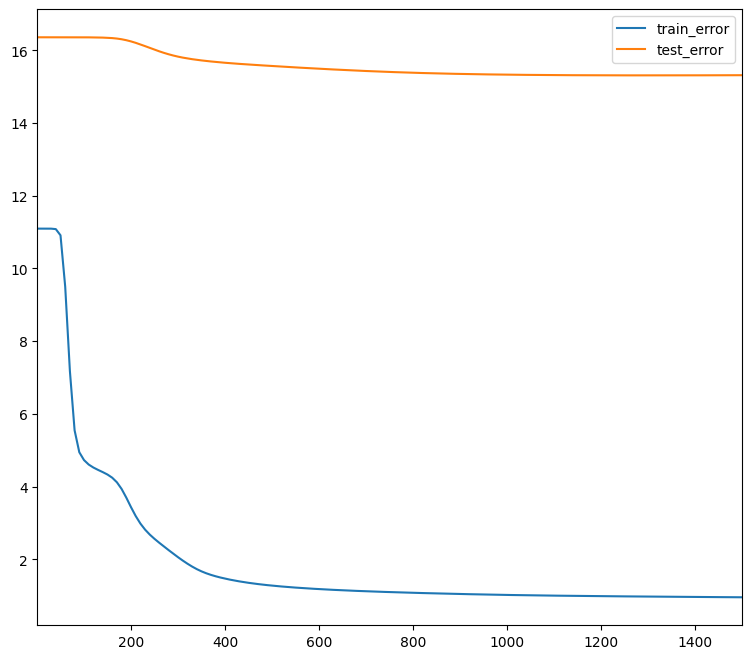

In [36]:
# Build the CF model and train it.
model = build_model(sales, embedding_dim=30, init_stddev=0.001)
model.train(num_iterations=1500, learning_rate=10.)

# IV. Inspecting the Embeddings

In this section, we take a closer look at the learned embeddings, by
- computing your recommendations
- looking at the nearest neighbors of some movies,
- looking at the norms of the movie embeddings,
- visualizing the embedding in a projected embedding space.

### Exercise 5: Write a function that computes the scores of the candidates
We start by writing a function that, given a query embedding $u \in \mathbb R^d$ and item embeddings $V \in \mathbb R^{N \times d}$, computes the item scores.

As discussed in the lecture, there are different similarity measures we can use, and these can yield different results. We will compare the following:
- dot product: the score of item j is $\langle u, V_j \rangle$.
- cosine: the score of item j is $\frac{\langle u, V_j \rangle}{\|u\|\|V_j\|}$.

Hints:
- you can use [`np.dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) to compute the product of two np.Arrays.
- you can use [`np.linalg.norm`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.norm.html) to compute the norm of a np.Array.

In [37]:
# DOT = 'dot'
# COSINE = 'cosine'
# def compute_scores(query_embedding, item_embeddings, measure=DOT):
#   """Computes the scores of the candidates given a query.
#   Args:
#     query_embedding: a vector of shape [k], representing the query embedding.
#     item_embeddings: a matrix of shape [N, k], such that row i is the embedding
#       of item i.
#     measure: a string specifying the similarity measure to be used. Can be
#       either DOT or COSINE.
#   Returns:
#     scores: a vector of shape [N], such that scores[i] is the score of item i.
#   """
#   # ========================= Complete this section ============================
#   # scores =
#   # ============================================================================
#   return scores

In [38]:
#@title Solution
DOT = 'dot'
COSINE = 'cosine'
def compute_scores(query_embedding, item_embeddings, measure=DOT):
  """Computes the scores of the candidates given a query.
  Args:
    query_embedding: a vector of shape [k], representing the query embedding.
    item_embeddings: a matrix of shape [N, k], such that row i is the embedding
      of item i.
    measure: a string specifying the similarity measure to be used. Can be
      either DOT or COSINE.
  Returns:
    scores: a vector of shape [N], such that scores[i] is the score of item i.
  """
  u = query_embedding
  V = item_embeddings
  if measure == COSINE:
    V = V / np.linalg.norm(V, axis=1, keepdims=True)
    u = u / np.linalg.norm(u)
  scores = u.dot(V.T)
  return scores

Equipped with this function, we can compute recommendations, where the query embedding can be either a user embedding or a movie embedding.

In [39]:
# # @title User recommendations and nearest neighbors (run this cell)
# def user_recommendations(model, measure=DOT, exclude_rated=False, k=6):
#   if USER_RATINGS:
#     scores = compute_scores(
#         model.embeddings["customer_id"][943], model.embeddings["product_id"], measure)
#     score_key = measure + ' score'
#     df = pd.DataFrame({
#         score_key: list(scores),
#         'product_id': products['product_id'],
#         'name_description': products['name_description'],
#         'lifestyle_group': products['lifestyle_group'],
#     })
#     if exclude_rated:
#       # remove products that are already rated
#       sold_products = sales[sales.customer_id == "2384aef55"]["product_id"].values
#       df = df[df.product_id.apply(lambda product_id: product_id not in sold_products)]
#     display.display(df.sort_values([score_key], ascending=False).head(k))

# def movie_neighbors(model, title_substring, measure=DOT, k=6):
#   # Search for product ids that match the given substring.
#   ids =  products[products['product_id'].str.contains(title_substring)].index.values
#   titles = products.iloc[ids]['product_id'].values
#   if len(titles) == 0:
#     raise ValueError("Found no products with product_id %s" % title_substring)
#   print("Nearest neighbors of : %s." % titles[0])
#   if len(titles) > 1:
#     print("[Found more than one matching product. Other candidates: {}]".format(
#         ", ".join(titles[1:])))
#   product_id = ids[0]
#   scores = compute_scores(
#       model.embeddings["product_id"][product_id], model.embeddings["product_id"],
#       measure)
#   score_key = measure + ' score'
#   df = pd.DataFrame({
#       score_key: list(scores),
#       'name_description': products['name_description'],
#       'lifestyle_group': products['lifestyle_group'],
#   })
#   display.display(df.sort_values([score_key], ascending=False).head(k))

### Your recommendations

If you chose to input your recommendations, you can run the next cell to generate recommendations for you.

In [40]:
# user_recommendations(model, measure=COSINE, k=5)

How do the recommendations look?

### Movie Nearest neighbors

Let's look at the neareast neighbors for some of the movies.

In [41]:
def movie_neighbors(model, product_id_substring, measure=DOT, k=6):
    a = np.array(model._product_id_mapping)
    print(a)
    product_id = np.where(a == product_id_substring)[0][0]

    scores = compute_scores(
        model.embeddings["product_id"][product_id], model.embeddings["product_id"],
        measure)
    score_key = measure + ' score'
    df = pd.DataFrame({
        score_key: list(scores)
    })
    top_indices = list(df.sort_values([score_key], ascending=False).head(k).index)
    product_info = products.iloc[top_indices]  # Fix this line
    # print(product_info.head(k))
    # display.display(df.sort_values([score_key], ascending=False).head(k))
    return product_info.head(k), df.sort_values([score_key], ascending=False).head(k)

# Example usage
k = 5
pro_info, scores = movie_neighbors(model, "479be36e01444741ba49fa778cba1da4NAD39", DOT, k)
pro_info

['649e1c5a4ed142e9889c9b557dd13550CAM35'
 '911e8bb521b645fe898eec1bd51be322XAM36'
 'a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40' ...
 '9c6fd0ed83404f9581b378f905ae8419CAM39'
 '6e4bd27d45dc4423ab62d7e6fa5b0db0HOG30'
 '479be36e01444741ba49fa778cba1da4NAD39']


,listing_price,lifestyle_group,name_description,product_id
74080,176727.000,Casual,"Dép Xốp Nữ, Đen, 36",1441bf86a063459c81447dc29735247eDEN36
82437,36327.000,Khác,"Vớ cổ ngắn Nam, Đen, 25",3504c5491598486781c1c3051b48e82eDEN25
73638,980836.000,Sport,"GTT Cao Cấp Nữ, Xám, 37",fbbcab74b3ca4a969f2fa788a0bc46c1XAM37
88663,294545.000,Casual,"Sandal thông dụng si đế c, Xanh nhớt, 35",4cd9308c08a140458d43accf6783bc6dXNH35
50315,39000.000,Casual,"Dép Xốp Bé Gái, Xanh dương, 27",c62d69c7246e4aa59dba99e3339d9c6cXDG27


In [42]:
scores

,dot score
9987,2.142
10594,1.538
9593,1.314
11045,1.186
1115,1.114


In [43]:
pro_info, scores = movie_neighbors(model, "479be36e01444741ba49fa778cba1da4NAD39", COSINE, k)
pro_info

['649e1c5a4ed142e9889c9b557dd13550CAM35'
 '911e8bb521b645fe898eec1bd51be322XAM36'
 'a56501ba8bad4d2c8cb5e7eeee2d46f7XNH40' ...
 '9c6fd0ed83404f9581b378f905ae8419CAM39'
 '6e4bd27d45dc4423ab62d7e6fa5b0db0HOG30'
 '479be36e01444741ba49fa778cba1da4NAD39']


,listing_price,lifestyle_group,name_description,product_id
90150,304364.000,Casual,"SanDal EVA Phun BGái, Tím, 35",5b2d5daaaae34532ab3ca20641591894TIM35
74092,191455.000,Casual,"Dép Xốp Nữ, Đen, 36",bd7c307a619f4abda455ee1e93a4cd5aDEN36
89271,368182.000,Casual,"Sandal thông dụng đế Eva phun N, Nâu, 43",65d9e7fd944b41ce9378bad622de9121NAU43
89068,85418.000,Casual,"Dép lào Nam Bitis, Xám, 40",79efe3286f984d9187cff3f95a30aef8XAM40
67846,240545.000,Casual,"Dép Xốp Nam, Xanh nhớt, 39",10def6e8a7f24216bdaeb3b7c5b793aeXNH39


In [44]:
scores

,cosine score
11893,1.000
9999,1.000
11591,1.000
11431,1.000
5854,1.000


In [45]:
# movie_neighbors(model, "479be36e01444741ba49fa778cba1da4NAD39", DOT)
# movie_neighbors(model, "479be36e01444741ba49fa778cba1da4NAD39", COSINE)

It seems that the quality of learned embeddings may not be very good. This will be addressed in Section V by adding several regularization techniques. First, we will further inspect the embeddings.

## Movie Embedding Norm

We can also observe that the recommendations with dot-product and cosine are different: with dot-product, the model tends to recommend popular movies. This can be explained by the fact that in matrix factorization models, the norm of the embedding is often correlated with popularity (popular movies have a larger norm), which makes it more likely to recommend more popular items. We can confirm this hypothesis by sorting the movies by their embedding norm, as done in the next cell.

In [46]:
# @title Embedding Visualization code (run this cell)

def product_embedding_norm(models):
  """Visualizes the norm and number of sales of the product embeddings.
  Args:
    model: A MFModel object.
  """
  if not isinstance(models, list):
    models = [models]

  df = pd.DataFrame({
      'product_id': products_sales['product_id'],
      'name_description': products_sales['name_description'],
      'lifestyle_group': products_sales['lifestyle_group'],
      'num_sales': products_sales['sold_quantity count']
  })
  print(df.head())
  charts = []
  brush = alt.selection_interval()
  for i, model in enumerate(models):
    norm_key = 'norm'+str(i)
    df[norm_key] = np.linalg.norm(model.embeddings["product_id"], axis=1)
    nearest = alt.selection(
        type='single', encodings=['x', 'y'], on='mouseover', nearest=True,
        empty='none')
    base = alt.Chart().mark_circle().encode(
        x='num_sales',
        y=norm_key,
        color=alt.condition(brush, alt.value('#4c78a8'), alt.value('lightgray'))
    ).properties(
        selection=nearest).add_selection(brush)
    text = alt.Chart().mark_text(align='center', dx=5, dy=-5).encode(
        x='num_sales', y=norm_key,
        text=alt.condition(nearest, 'name_description', alt.value('')))
    charts.append(alt.layer(base, text))
  return alt.hconcat(*charts, data=df)

def visualize_movie_embeddings(data, x, y):
  nearest = alt.selection(
      type='single', encodings=['x', 'y'], on='mouseover', nearest=True,
      empty='none')
  base = alt.Chart().mark_circle().encode(
      x=x,
      y=y,
      color=alt.condition(style_filter, "lifestyle_group", alt.value("whitesmoke")),
  ).properties(
      width=600,
      height=600,
      selection=nearest)
  text = alt.Chart().mark_text(align='left', dx=5, dy=-5).encode(
      x=x,
      y=y,
      text=alt.condition(nearest, 'name_description', alt.value('')))
  return alt.hconcat(alt.layer(base, text), style_chart, data=data)

def tsne_movie_embeddings(model):
  """Visualizes the movie embeddings, projected using t-SNE with Cosine measure.
  Args:
    model: A MFModel object.
  """
  tsne = sklearn.manifold.TSNE(
      n_components=2, perplexity=40, metric='cosine', early_exaggeration=10.0,
      init='pca', verbose=True, n_iter=400)

  print('Running t-SNE...')
  V_proj = tsne.fit_transform(model.embeddings["product_id"])
  products.loc[:,'x'] = V_proj[:, 0]
  products.loc[:,'y'] = V_proj[:, 1]
  return visualize_movie_embeddings(products, 'x', 'y')

In [47]:
product_embedding_norm(model)

Output hidden; open in https://colab.research.google.com to view.

Note: Depending on how the model is initialized, you may observe that some niche movies (ones with few ratings) have a high norm, leading to spurious recommendations. This can happen if the embedding of that movie happens to be initialized with a high norm. Then, because the movie has few ratings, it is infrequently updated, and can keep its high norm. This will be alleviated by using regularization.

Try changing the value of the hyper-parameter `init_stddev`. One quantity that can be helpful is that the expected norm of a $d$-dimensional vector with entries $\sim \mathcal N(0, \sigma^2)$ is approximatley $\sigma \sqrt d$.

How does this affect the embedding norm distribution, and the ranking of the top-norm movies?

In [48]:
#@title Solution
model_lowinit = build_model(sales, embedding_dim=30, init_stddev=0.05)
model_lowinit.train(num_iterations=1000, learning_rate=10.)
movie_neighbors(model_lowinit, "479be36e01444741ba49fa778cba1da4NAD39", DOT)
movie_neighbors(model_lowinit, "479be36e01444741ba49fa778cba1da4NAD39", COSINE)
product_embedding_norm([model, model_lowinit])

Output hidden; open in https://colab.research.google.com to view.

## Embedding visualization
Since it is hard to visualize embeddings in a higher-dimensional space (when the embedding dimension $k > 3$), one approach is to project the embeddings to a lower dimensional space. T-SNE (T-distributed Stochastic Neighbor Embedding) is an algorithm that projects the embeddings while attempting to preserve their pariwise distances. It can be useful for visualization, but one should use it with care. For more information on using t-SNE, see [How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/).

In [49]:
tsne_movie_embeddings(model_lowinit)

Output hidden; open in https://colab.research.google.com to view.

# V. Regularization In Matrix Factorization

In the previous section, our loss was defined as the mean squared error on the observed part of the rating matrix.  As discussed in the lecture, this can be problematic as the model does not learn how to place the embeddings of irrelevant movies. This phenomenon is known as *folding*.

We will add regularization terms that will address this issue. We will use two types of regularization:
- Regularization of the model parameters. This is a common $\ell_2$ regularization term on the embedding matrices, given by $r(U, V) =  \frac{1}{N} \sum_i \|U_i\|^2 + \frac{1}{M}\sum_j \|V_j\|^2$.
- A global prior that pushes the prediction of any pair towards zero, called the *gravity* term. This is given by $g(U, V) = \frac{1}{MN} \sum_{i = 1}^N \sum_{j = 1}^M \langle U_i, V_j \rangle^2$.

The total loss is then given by
$$
\frac{1}{|\Omega|}\sum_{(i, j) \in \Omega} (A_{ij} - \langle U_i, V_j\rangle)^2 + \lambda _r r(U, V) + \lambda_g g(U, V)
$$
where $\lambda_r$ and $\lambda_g$ are two regularization coefficients (hyper-parameters).

### Exercise 6: Build a regularized Matrix Factorization model and train it
Write a function that builds a regularized model. You are given a function `gravity(U, V)` that computes the gravity term given the two embedding matrices $U$ and $V$.


In [50]:
# def gravity(U, V):
#   """Creates a gravity loss given two embedding matrices."""
#   return 1. / (U.shape[0].value*V.shape[0].value) * tf.reduce_sum(
#       tf.matmul(U, U, transpose_a=True) * tf.matmul(V, V, transpose_a=True))

# def build_regularized_model(
#     ratings, embedding_dim=3, regularization_coeff=.1, gravity_coeff=1.,
#     init_stddev=0.1):
#   """
#   Args:
#     ratings: the DataFrame of movie ratings.
#     embedding_dim: The dimension of the embedding space.
#     regularization_coeff: The regularization coefficient lambda.
#     gravity_coeff: The gravity regularization coefficient lambda_g.
#   Returns:
#     A CFModel object that uses a regularized loss.
#   """
#   # Split the ratings DataFrame into train and test.
#   train_ratings, test_ratings = split_dataframe(ratings)
#   # SparseTensor representation of the train and test datasets.
#   A_train = build_rating_sparse_tensor(train_ratings)
#   A_test = build_rating_sparse_tensor(test_ratings)
#   U = tf.Variable(tf.random_normal(
#       [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
#   V = tf.Variable(tf.random_normal(
#       [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))

#   # ========================= Complete this section ============================
#   # error_train =
#   # error_test =
#   # gravity_loss =
#   # regularization_loss =
#   # ============================================================================
#   total_loss = error_train + regularization_loss + gravity_loss
#   losses = {
#       'train_error': error_train,
#       'test_error': error_test,
#   }
#   loss_components = {
#       'observed_loss': error_train,
#       'regularization_loss': regularization_loss,
#       'gravity_loss': gravity_loss,
#   }
#   embeddings = {"user_id": U, "movie_id": V}

#   return CFModel(embeddings, total_loss, [losses, loss_components])

In [51]:
# @title Solution
def gravity(U, V):
  """Creates a gravity loss given two embedding matrices."""
  return 1. / (U.shape[0].value*V.shape[0].value) * tf.reduce_sum(
      tf.matmul(U, U, transpose_a=True) * tf.matmul(V, V, transpose_a=True))

def build_regularized_model(
    ratings, embedding_dim=3, regularization_coeff=.1, gravity_coeff=1.,
    init_stddev=0.1):
  """
  Args:
    ratings: the DataFrame of movie ratings.
    embedding_dim: The dimension of the embedding space.
    regularization_coeff: The regularization coefficient lambda.
    gravity_coeff: The gravity regularization coefficient lambda_g.
  Returns:
    A CFModel object that uses a regularized loss.
  """
  # Split the ratings DataFrame into train and test.
  train_ratings, test_ratings = split_dataframe(ratings)
  # SparseTensor representation of the train and test datasets.
  A_train, product_id_mapping = build_rating_sparse_tensor(train_ratings)
  A_test, product_id_mapping = build_rating_sparse_tensor(test_ratings)
  U = tf.Variable(tf.random_normal(
      [A_train.dense_shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.dense_shape[1], embedding_dim], stddev=init_stddev))

  error_train = sparse_mean_square_error(A_train, U, V)
  error_test = sparse_mean_square_error(A_test, U, V)
  gravity_loss = gravity_coeff * gravity(U, V)
  regularization_loss = regularization_coeff * (
      tf.reduce_sum(U*U)/U.shape[0].value + tf.reduce_sum(V*V)/V.shape[0].value)
  total_loss = error_train + regularization_loss + gravity_loss
  losses = {
      'train_error_observed': error_train,
      'test_error_observed': error_test,
  }
  loss_components = {
      'observed_loss': error_train,
      'regularization_loss': regularization_loss,
      'gravity_loss': gravity_loss,
  }
  embeddings = {"customer_id": U, "product_id": V}

  return CFModel(embeddings, total_loss, [losses, loss_components], product_id_mapping)

It is now time to train the regularized model! You can try different values of the regularization coefficients, and different embedding dimensions.

<ipython-input-35-23c45c9e1663>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['sold_quantity'] = pd.to_numeric(sales_df['sold_quantity'], errors='coerce')


 iteration 2000: train_error_observed=0.912682, test_error_observed=9.997549, observed_loss=0.912682, regularization_loss=0.421321, gravity_loss=0.214431

[{'train_error_observed': 0.91268176, 'test_error_observed': 9.997549},
 {'observed_loss': 0.91268176,
  'regularization_loss': 0.4213209,
  'gravity_loss': 0.21443099}]

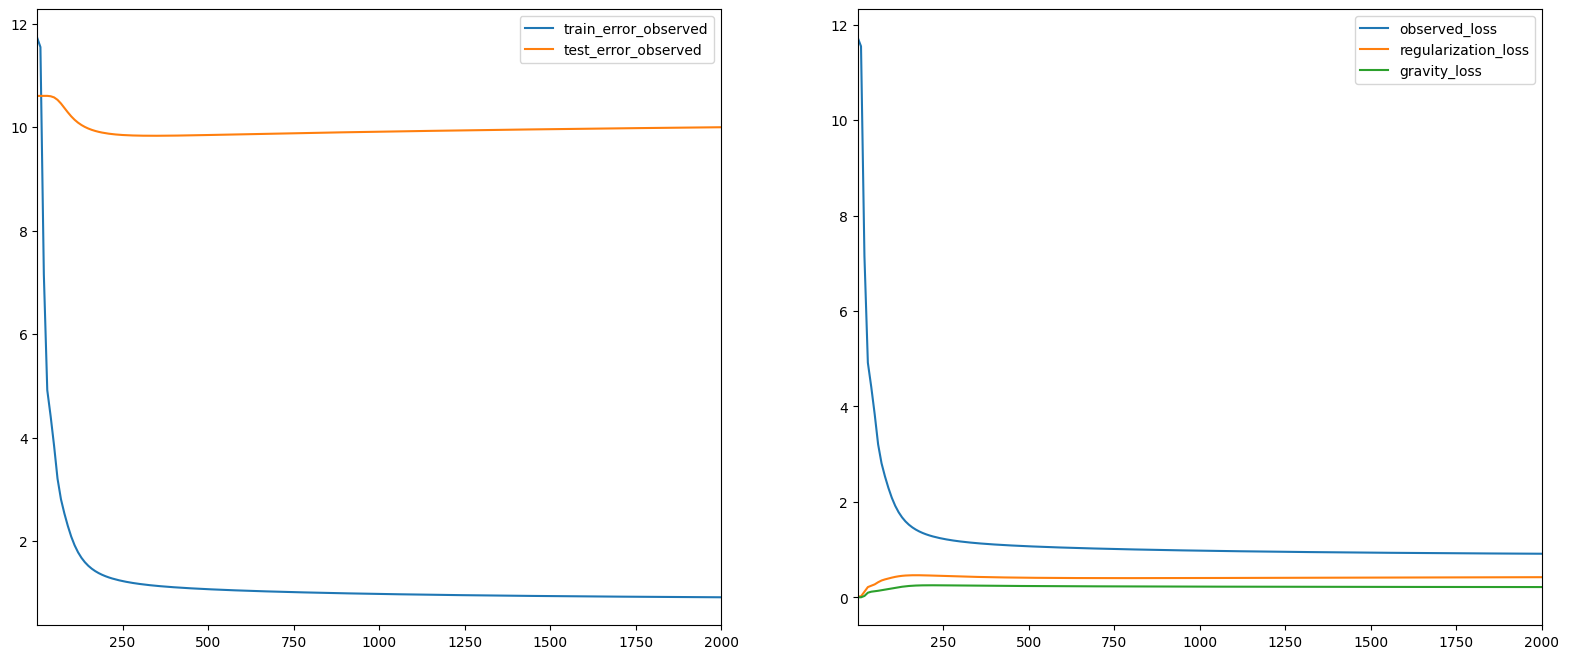

In [52]:
reg_model = build_regularized_model(
    sales, regularization_coeff=0.1, gravity_coeff=1.0, embedding_dim=35,
    init_stddev=.05)
reg_model.train(num_iterations=2000, learning_rate=20.)

Observe that adding the regularization terms results in a higher MSE, both on the training and test set. However, as we will see, the quality of the recommendations improves. This highlights a tension between fitting the observed data and minimizing the regularization terms. Fitting the observed data often emphasizes learning high similarity (between items with many interactions), but a good embedding representation also requires learning low similarity (between items with few or no interactions).

### Inspect the results
Let's see if the results with regularization look better.

In [53]:
# # @title User recommendations and nearest neighbors (run this cell)
# def user_recommendations(model, measure=DOT, exclude_rated=False, k=6):
#   if True:
#     scores = compute_scores(
#         model.embeddings["customer_id"]['2384aef55'], model.embeddings["product_id"], measure)
#     score_key = measure + ' score'
#     df = pd.DataFrame({
#         score_key: list(scores),
#         'product_id': products['product_id'],
#         'name_description': products['name_description'],
#         'lifestyle_group': products['lifestyle_group'],
#     })
#     if exclude_rated:
#       # remove products that are already rated
#       sold_products = sales[sales.customer_id == "2384aef55"]["product_id"].values
#       df = df[df.product_id.apply(lambda product_id: product_id not in sold_products)]
#     display.display(df.sort_values([score_key], ascending=False).head(k))

In [54]:
# user_recommendations(reg_model, DOT, exclude_rated=True, k=10)

Hopefully, these recommendations look better. You can change the similarity measure from COSINE to DOT and observe how this affects the recommendations.

Since the model is likely to recommend items that you rated highly, you have the option to exclude the items you rated, using `exclude_rated=True`.

In the following cells, we display the nearest neighbors, the embedding norms, and the t-SNE projection of the movie embeddings.

In [55]:
reg_model._product_id_mapping

Index(['752dbc41043748ac94aded8dceaf109dXAM33',
       '890dde2ffe4e4a36ba78b89120f1c7f5DOO41',
       '4a876b844e7e4e80b73ce7df81bb865bDEN42',
       '6398d788c0af40179dd9f6eb72b12c1eTIM31',
       '64779b1dad8241629c245fa03fe3fbf6DEN43',
       '29b031f1a2434ced93ced9a1bbe7e055XNH37',
       '81548cdfcfdf459894cf689a14ff2555XDG30',
       '07cbaadb64c143198542b3936e28677cDEN38',
       'd116192af5e745108634252b0c180a6cHOG38',
       '31fff14384464df0997348d7c1af8afbDEN43',
       ...
       '4722e58d4dcf40a882289b774dc7e23cXAM37',
       '2488ed0489c84a2fb820e8f171823671KED35',
       '3109d3e66b754180a21e9c6a174d7342XAM34',
       '78c620e5067f4068aa299dff221199b6HOG39',
       '1c19dc757552468b95636ad65b601f7dTRG37',
       '75db87d4ebc34dea9443a544382dcdd5DOO32',
       '49c2c28164b04c2c8348e7d625f53a1aXDG41',
       'e1d1a29409614f2dafdf80273fcae88eDOO32',
       'c26c401883c8450cbd8f5edef2cd600aKEM39',
       '523edf60b0434e8bb8c70bc81976ded8XAM38'],
      dtype='object', length

In [56]:
movie_neighbors(reg_model, "814cee2edf144bc4812352e2f7557acfXAM43", DOT)
movie_neighbors(reg_model, "814cee2edf144bc4812352e2f7557acfXAM43", COSINE)

['752dbc41043748ac94aded8dceaf109dXAM33'
 '890dde2ffe4e4a36ba78b89120f1c7f5DOO41'
 '4a876b844e7e4e80b73ce7df81bb865bDEN42' ...
 'e1d1a29409614f2dafdf80273fcae88eDOO32'
 'c26c401883c8450cbd8f5edef2cd600aKEM39'
 '523edf60b0434e8bb8c70bc81976ded8XAM38']
['752dbc41043748ac94aded8dceaf109dXAM33'
 '890dde2ffe4e4a36ba78b89120f1c7f5DOO41'
 '4a876b844e7e4e80b73ce7df81bb865bDEN42' ...
 'e1d1a29409614f2dafdf80273fcae88eDOO32'
 'c26c401883c8450cbd8f5edef2cd600aKEM39'
 '523edf60b0434e8bb8c70bc81976ded8XAM38']


(       listing_price lifestyle_group                 name_description  \
 1321      181636.000          Casual              Dép Xốp Nữ, Đen, 38   
 61496     314182.000          Casual  SanDal EVA Phun BGái, Trắng, 35   
 61963     176727.000          Casual      Dép PU Phun Bé Trai, Đỏ, 32   
 62458     422182.000           Sport    GTT quai dệt bé trai, Đen, 33   
 37226      99000.000          Casual   SanDal EVA Phun BGái, Hồng, 34   
 68238      13500.000            Khác   Bút chì gỗ GP-01 vỉ 3, Đen, 22   
 
                                   product_id      x      y  
 1321   581ba20e6954421c8cc78b6e18893033DEN38 -1.907  1.715  
 61496  883a3b0fdb1a432f9fb9630d9ce96d6fTRG35  5.112  3.387  
 61963  3d94a175df104bd38f2d05dd0861cd8bDOO32 -6.664 -8.015  
 62458  77b1f394a9fa48d9ba6ca944e5789100DEN33 -8.849 -4.532  
 37226  9a1ceda32aea45ecbdf85d3dffc9128cHOG34 11.887 -4.378  
 68238  9286859af5c54e2ebf9f4ab7e1c426a4DEN22 -8.578  8.761  ,
       cosine score
 167          1.000
 3362

Here we compare the embedding norms for `model` and `reg_model`. Selecting a subset of the embeddings will highlight them on both charts simultaneously.

In [57]:
product_embedding_norm([model, model_lowinit, reg_model])

Output hidden; open in https://colab.research.google.com to view.

In [58]:
# Visualize the embeddings
tsne_movie_embeddings(reg_model)

Output hidden; open in https://colab.research.google.com to view.

# VI. Softmax model

In this section, we will train a simple softmax model that predicts whether a given user has rated a movie.

**Note**: if you are taking the self-study version of the class, make sure to read through the part of the class covering Softmax training before working on this part.

The model will take as input a feature vector $x$ representing the list of movies the user has rated. We start from the ratings DataFrame, which we group by user_id.

In [59]:
sold_products = (sales[["customer_id", "product_id"]]
                .groupby("customer_id", as_index=False)
                .aggregate(lambda x: list(x)))
sold_products.head()

,customer_id,product_id
0,004c2ae83,"[0771c9713add4f46be4d3fc5befe3f04XNH28, 9dfd7b..."
1,007e6bb72,"[c2ffd7fa723f44e2824c5b6792e45584XAM41, 7f11ad..."
2,0086cd855,"[f3bf02235fb54fcab770df485aef76f4DOO35, 85b678..."
3,01347a866,"[e66a1f00ab6a4f40b838f63c2a949658XDL37, f3f90f..."
4,0196d459c,"[7d1a6e47ca49494d8e53c114eeb2f25aXLC37, fe34ca..."


We then create a function that generates an example batch, such that each example contains the following features:
- movie_id: A tensor of strings of the movie ids that the user rated.
- genre: A tensor of strings of the genres of those movies
- year: A tensor of strings of the release year.

In [66]:
# create a dict to save (base10 id, product_id) list
# id_dict = ...
# and map them to products and sales DataFrame as product_id_2
# ....

In [64]:
#@title Batch generation code (run this cell)
years_dict = {
    movie: year for movie, year in zip(products["product_id"], products["lifestyle_group"])
}
genres_dict = {
    movie: genres.split(',')
    for movie, genres in zip(products["product_id"], products["name_description"])
}

def make_batch(ratings, batch_size):
  """Creates a batch of examples.
  Args:
    ratings: A DataFrame of ratings such that examples["movie_id"] is a list of
      movies rated by a user.
    batch_size: The batch size.
  """
  def pad(x, fill):
    return pd.DataFrame.from_dict(x).fillna(fill).values

  movie = []
  year = []
  genre = []
  label = []
  for movie_ids in ratings["product_id"].values:
    movie.append(movie_ids)
    genre.append([x for movie_id in movie_ids for x in genres_dict[movie_id]])
    year.append([years_dict[movie_id] for movie_id in movie_ids])
    label.append([int(movie_id) for movie_id in movie_ids])
  features = {
      "movie_id": pad(movie, ""),
      "year": pad(year, ""),
      "genre": pad(genre, ""),
      "label": pad(label, -1)
  }
  batch = (
      tf.data.Dataset.from_tensor_slices(features)
      .shuffle(1000)
      .repeat()
      .batch(batch_size)
      .make_one_shot_iterator()
      .get_next())
  return batch

def select_random(x):
  """Selectes a random elements from each row of x."""
  def to_float(x):
    return tf.cast(x, tf.float32)
  def to_int(x):
    return tf.cast(x, tf.int64)
  batch_size = tf.shape(x)[0]
  rn = tf.range(batch_size)
  nnz = to_float(tf.count_nonzero(x >= 0, axis=1))
  rnd = tf.random_uniform([batch_size])
  ids = tf.stack([to_int(rn), to_int(nnz * rnd)], axis=1)
  return to_int(tf.gather_nd(x, ids))


In [65]:
print(make_batch(sold_products, 32))

ValueError: ignored

### Loss function
Recall that the softmax model maps the input features $x$ to a user embedding $\psi(x) \in \mathbb R^d$, where $d$ is the embedding dimension. This vector is then multiplied by a movie embedding matrix $V \in \mathbb R^{m \times d}$ (where $m$ is the number of movies), and the final output of the model is the softmax of the product
$$
\hat p(x) = \text{softmax}(\psi(x) V^\top).
$$
Given a target label $y$, if we denote by $p = 1_y$ a one-hot encoding of this target label, then the loss is the cross-entropy between $\hat p(x)$ and $p$.

### Exercise 7: Write a loss function for the softmax model.

In this exercise, we will write a function that takes tensors representing the user embeddings $\psi(x)$, movie embeddings $V$, target label $y$, and return the cross-entropy loss.

Hint: You can use the function [`tf.nn.sparse_softmax_cross_entropy_with_logits`](https://www.tensorflow.org/api_docs/python/tf/nn/sparse_softmax_cross_entropy_with_logits), which takes `logits` as input, where `logits` refers to the product $\psi(x) V^\top$.

In [ ]:
# def softmax_loss(user_embeddings, product_embeddings, labels):
#   """Returns the cross-entropy loss of the softmax model.
#   Args:
#     user_embeddings: A tensor of shape [batch_size, embedding_dim].
#     product_embeddings: A tensor of shape [num_products, embedding_dim].
#     labels: A sparse tensor of dense_shape [batch_size, 1], such that
#       labels[i] is the target label for example i.
#   Returns:
#     The mean cross-entropy loss.
#   """
#   # ========================= Complete this section ============================
#   # logits =
#   # loss =
#   # ============================================================================
#   return loss

In [ ]:
# @title Solution
def softmax_loss(user_embeddings, product_embeddings, labels):
  """Returns the cross-entropy loss of the softmax model.
  Args:
    user_embeddings: A tensor of shape [batch_size, embedding_dim].
    product_embeddings: A tensor of shape [num_products, embedding_dim].
    labels: A tensor of [batch_size], such that labels[i] is the target label
      for example i.
  Returns:
    The mean cross-entropy loss.
  """
  # Verify that the embddings have compatible dimensions
  user_emb_dim = user_embeddings.shape[1].value
  product_emb_dim = product_embeddings.shape[1].value
  if user_emb_dim != product_emb_dim:
    raise ValueError(
        "The user embedding dimension %d should match the movie embedding "
        "dimension % d" % (user_emb_dim, product_emb_dim))

  logits = tf.matmul(user_embeddings, product_embeddings, transpose_b=True)
  loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
      logits=logits, labels=labels))
  return loss

### Exercise 8: Build a softmax model, train it, and inspect its embeddings.

We are now ready to build a softmax CFModel. Complete the `build_softmax_model` function in the next cell. The architecture of the model is defined in the function `create_user_embeddings` and illustrated in the figure below. The input embeddings (movie_id, genre and year) are concatenated to form the input layer, then we have hidden layers with dimensions specified by the `hidden_dims` argument. Finally, the last hidden layer is multiplied by the movie embeddings to obtain the logits layer. For the target label, we will use a randomly-sampled movie_id from the list of movies the user rated.

![Softmax model](https://github.com/google/eng-edu/blob/master/ml/recommendation-systems/images/softmax-model.png?raw=true)

Complete the function below by creating the feature columns and embedding columns, then creating the loss tensors both for the train and test sets (using the `softmax_loss` function of the previous exercise).


In [ ]:
# def build_softmax_model(sold_products, embedding_cols, hidden_dims):
#   """Builds a Softmax model for MovieLens.
#   Args:
#     sold_products: DataFrame of traing examples.
#     embedding_cols: A dictionary mapping feature names (string) to embedding
#       column objects. This will be used in tf.feature_column.input_layer() to
#       create the input layer.
#     hidden_dims: int list of the dimensions of the hidden layers.
#   Returns:
#     A CFModel object.
#   """
#   def create_network(features):
#     """Maps input features dictionary to user embeddings.
#     Args:
#       features: A dictionary of input string tensors.
#     Returns:
#       outputs: A tensor of shape [batch_size, embedding_dim].
#     """
#     # Create a bag-of-words embedding for each sparse feature.
#     inputs = tf.feature_column.input_layer(features, embedding_cols)
#     # Hidden layers.
#     input_dim = inputs.shape[1].value
#     for i, output_dim in enumerate(hidden_dims):
#       w = tf.get_variable(
#           "hidden%d_w_" % i, shape=[input_dim, output_dim],
#           initializer=tf.truncated_normal_initializer(
#               stddev=1./np.sqrt(output_dim))) / 10.
#       outputs = tf.matmul(inputs, w)
#       input_dim = output_dim
#       inputs = outputs
#     return outputs

#   train_sold_products, test_sold_products = split_dataframe(sold_products)
#   train_batch = make_batch(train_sold_products, 200)
#   test_batch = make_batch(test_sold_products, 100)

#   with tf.variable_scope("model", reuse=False):
#     # Train
#     train_user_embeddings = create_network(train_batch)
#     train_labels = select_random(train_batch["label"])
#   with tf.variable_scope("model", reuse=True):
#     # Test
#     test_user_embeddings = create_network(test_batch)
#     test_labels = select_random(test_batch["label"])
#     movie_embeddings = tf.get_variable(
#         "input_layer/movie_id_embedding/embedding_weights")

#   # ========================= Complete this section ============================
#   # train_loss =
#   # test_loss =
#   # test_precision_at_10 =
#   # ============================================================================

#   metrics = (
#       {"train_loss": train_loss, "test_loss": test_loss},
#       {"test_precision_at_10": test_precision_at_10}
#   )
#   embeddings = {"movie_id": movie_embeddings}
#   return CFModel(embeddings, train_loss, metrics)

In [ ]:
def build_softmax_model(sold_products, embedding_cols, hidden_dims):
  """Builds a Softmax model for MovieLens.
  Args:
    sold_products: DataFrame of traing examples.
    embedding_cols: A dictionary mapping feature names (string) to embedding
      column objects. This will be used in tf.feature_column.input_layer() to
      create the input layer.
    hidden_dims: int list of the dimensions of the hidden layers.
  Returns:
    A CFModel object.
  """
  def create_network(features):
    """Maps input features dictionary to user embeddings.
    Args:
      features: A dictionary of input string tensors.
    Returns:
      outputs: A tensor of shape [batch_size, embedding_dim].
    """
    # Create a bag-of-words embedding for each sparse feature.
    inputs = tf.feature_column.input_layer(features, embedding_cols)
    # Hidden layers.
    input_dim = inputs.shape[1].value
    for i, output_dim in enumerate(hidden_dims):
      w = tf.get_variable(
          "hidden%d_w_" % i, shape=[input_dim, output_dim],
          initializer=tf.truncated_normal_initializer(
              stddev=1./np.sqrt(output_dim))) / 10.
      outputs = tf.matmul(inputs, w)
      input_dim = output_dim
      inputs = outputs
    return outputs

  train_sold_products, test_sold_products = split_dataframe(sold_products)
  train_batch = make_batch(train_sold_products, 200)
  test_batch = make_batch(test_sold_products, 100)

  with tf.variable_scope("model", reuse=False):
    # Train
    train_user_embeddings = create_network(train_batch)
    train_labels = select_random(train_batch["label"])
  with tf.variable_scope("model", reuse=True):
    # Test
    test_user_embeddings = create_network(test_batch)
    test_labels = select_random(test_batch["label"])
    product_embeddings = tf.get_variable(
        "input_layer/product_id_embedding/embedding_weights")

  test_loss = softmax_loss(
      test_user_embeddings, product_embeddings, test_labels)
  train_loss = softmax_loss(
      train_user_embeddings, product_embeddings, train_labels)
  _, test_precision_at_10 = tf.metrics.precision_at_k(
      labels=test_labels,
      predictions=tf.matmul(test_user_embeddings, product_embeddings, transpose_b=True),
      k=10)

  metrics = (
      {"train_loss": train_loss, "test_loss": test_loss},
      {"test_precision_at_10": test_precision_at_10}
  )
  embeddings = {"product_id": product_embeddings}
  return CFModel(embeddings, train_loss, metrics)

### Train the Softmax model

We are now ready to train the softmax model. You can set the following hyperparameters:
- learning rate
- number of iterations. Note: you can run `softmax_model.train()` again to continue training the model from its current state.
- input embedding dimensions (the `input_dims` argument)
- number of hidden layers and size of each layer (the `hidden_dims` argument)

Note: since our input features are string-valued (movie_id, genre, and year), we need to map them to integer ids. This is done using [`tf.feature_column.categorical_column_with_vocabulary_list`](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list), which takes a vocabulary list specifying all the values the feature can take. Then each id is mapped to an embedding vector using [`tf.feature_column.embedding_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column).


In [ ]:
# # Create feature embedding columns
# def make_embedding_col(key, embedding_dim):
#   categorical_col = tf.feature_column.categorical_column_with_vocabulary_list(
#       key=key, vocabulary_list=list(set(products[key].values)), num_oov_buckets=0)
#   return tf.feature_column.embedding_column(
#       categorical_column=categorical_col, dimension=embedding_dim,
#       # default initializer: trancated normal with stddev=1/sqrt(dimension)
#       combiner='mean')

# sold_products.product_id = sold_products['product_id'].apply(lambda x: int(x) if str(x).isdigit() else 0)
# with tf.Graph().as_default():
#   softmax_model = build_softmax_model(
#       sold_products,
#       embedding_cols=[
#           make_embedding_col("product_id", 35),
#           make_embedding_col("name_description", 3),
#           make_embedding_col("lifestyle_group", 2),
#       ],
#       hidden_dims=[35])

# softmax_model.train(
#     learning_rate=8., num_iterations=3000, optimizer=tf.train.AdagradOptimizer)

# Create feature embedding columns
def make_embedding_col(key, embedding_dim):
    categorical_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=key, vocabulary_list=list(set(products[key].values)), num_oov_buckets=0)
    return tf.feature_column.embedding_column(
        categorical_column=categorical_col, dimension=embedding_dim,
        # default initializer: truncated normal with stddev=1/sqrt(dimension)
        combiner='mean')

sold_products['product_id'] = sold_products['product_id'].apply(lambda x: [int(x)] if str(x).isdigit() else [0])

with tf.Graph().as_default():
    softmax_model = build_softmax_model(
        sold_products,
        embedding_cols=[
            make_embedding_col("product_id", 35),
            make_embedding_col("name_description", 3),
            make_embedding_col("lifestyle_group", 2),
        ],
        hidden_dims=[35])

    softmax_model.train(
        input_fn=lambda: make_batch(sold_products, batch_size=32),
        steps=3000,
        hooks=[tf.train.FeedFnHook(lambda: make_batch(sold_products, batch_size=32))],
        optimizer=tf.train.AdagradOptimizer(learning_rate=8.)
    )


In [ ]:
sold_products

### Inspect the embeddings

We can inspect the movie embeddings as we did for the previous models. Note that in this case, the movie embeddings are used at the same time as input embeddings (for the bag of words representation of the user history), and as softmax weights.

In [ ]:
movie_neighbors(softmax_model, "Aladdin", DOT)
movie_neighbors(softmax_model, "Aladdin", COSINE)

In [ ]:
movie_embedding_norm([reg_model, softmax_model])

In [ ]:
tsne_movie_embeddings(softmax_model)

## Congratulations!

You have completed this Colab notebook.

If you would like to further explore these models, we encourage you to try different hyperparameters and observe how this affects the quality of the model and the structure of the embedding space. Here are some suggestions:
- Change the embedding dimension.
- In the softmax model: change the number of hidden layers, and the input features. For example, you can try a model with no hidden layers, and only the movie ids as inputs.
- Using other similarity measures: In this Colab notebook, we used dot product $d(u, V_j) = \langle u, V_j \rangle$ and cosine $d(u, V_j) = \frac{\langle u, V_j \rangle}{\|u\|\|V_j\|}$, and discussed how the norms of the embeddings affect the recommendations. You can also try other variants which apply a transformation to the norm, for example $d(u, V_j) = \frac{\langle u, V_j \rangle}{\|V_j\|^\alpha}$.